<a href="https://colab.research.google.com/github/JaviCeRodriguez/Practicas-ML/blob/main/notebooks/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA)

A partir de un dataset, se realiza una exploración previa de los datos del dataset

In [1]:
# Importaciones
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Cargamos dataset y observamos las primeras 10 filas
PATH_DATASET = "..\datasets\winemag-data-130k-v2.csv"
wines = pd.read_csv(PATH_DATASET, index_col=0)
wines.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Exploración rápida de los datos

In [3]:
# Información de las features
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


Según la información del dataset en Kaggle, tenemos que:
- `country`: The country that the wine is from
- `description`
- `designation`: The vineyard within the winery where the grapes that made the wine are from
- `points`: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score &gt;=80)
- `price`: The cost for a bottle of the wine
- `province`: The province or state that the wine is from
- `region_1`: The wine growing area in a province or state (ie Napa)
- `region_2`: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- `taster_name`:
- `taster_twitter_handle`
- `title`: The title of the wine review, which often contains the vintage if you're interested in extracting that feature
- `variety`: The type of grapes used to make the wine (ie Pinot Noir)
- `winery`: The winery that made the wine

Veamos ahora la media del precio en cada pais. Para esto, obtendremos los primeros 10 valores de forma descendente, luego lo visualizamos en un gráfico de barras.

In [4]:
groups = wines.groupby('country').mean().reset_index('country').sort_values('price', ascending=False)
groups[:10]

,country,points,price
38,Switzerland,88.571429,85.285714
14,England,91.581081,51.681159
17,Germany,89.851732,42.257547
15,France,88.845109,41.139120
19,Hungary,89.191781,40.648276
22,Italy,88.562231,39.663770
40,US,88.563720,36.573464
7,Canada,89.369650,35.712598
2,Australia,88.580507,35.437663
21,Israel,88.471287,31.768916


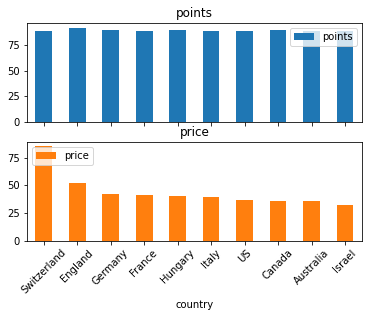

In [11]:
axes = groups.head(10).plot.bar(x='country', rot=45, subplots=True)
axes[1].legend(loc=2)  

Por lo visto, no aparece Argentina en el top 10 🤨. Puede que sea algo bueno (?).

- Vemos que la media de las 10 provincias con la media de vinos más caros mantienen un puntaje similar en las reviews.
- El vino más caro (siempre hablando de la media) es de Suiza, seguido de Inglaterra y Alemania.
- Hay un gran margen entre el precio del vino entre Suiza e Inglaterra